In [1]:
import pydotplus 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn import model_selection
import numpy as np

C:\Users\1\Miniconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = np.genfromtxt("data.txt")

In [3]:
data

array([[  1.,   6.,   4., ...,   0.,   1.,   1.],
       [  2.,  48.,   2., ...,   0.,   1.,   2.],
       [  4.,  12.,   4., ...,   1.,   0.,   1.],
       ..., 
       [  4.,  12.,   2., ...,   0.,   1.,   1.],
       [  1.,  45.,   2., ...,   0.,   1.,   2.],
       [  2.,  45.,   4., ...,   0.,   1.,   1.]])

In [4]:
X,y = data[:,:-1], data[:,-1]

In [5]:
model = tree.DecisionTreeClassifier(max_depth=6)

In [6]:
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [7]:
dot_data = tree.export_graphviz(model, out_file="small_tree.out", filled=True, rounded=True, special_characters=True)

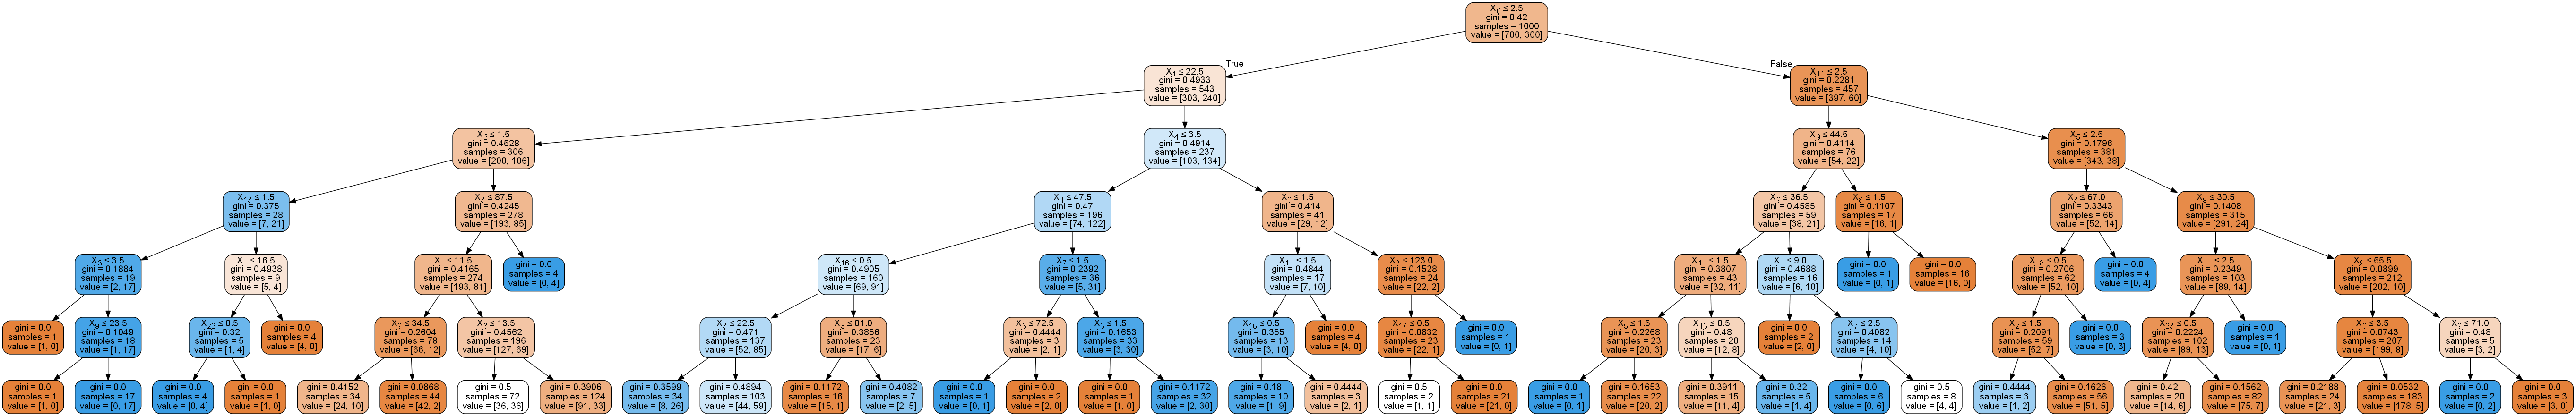

In [8]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png())  

Первые разбиение идут по признакам для решения о выдаче кредита, такие как состояние счета, есть ли работа и сколько по времени и т.д.

In [9]:
arr = []
train_score = []
for max_depth in range(1, 100):
    model = tree.DecisionTreeClassifier(max_depth=max_depth)
    score = np.mean(model_selection.cross_val_score(model, X, y))
    model.fit(X, y)
    train_score.append(f1_score(model.predict(X), y))
    arr.append(score)

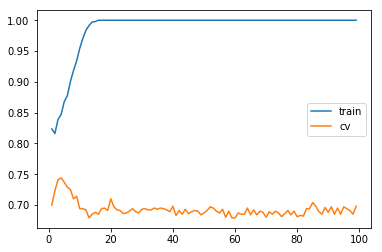

In [10]:
plt.plot(range(1, 100), train_score, label='train')
plt.plot(range(1, 100), arr, label='cv')
plt.legend(loc='best')
plt.show()

При использовании кроссвалидации наше дерево не переобучается с увеличением глубины, даже видно что уровень обучения приблизительно одинаков. Если же строить дерево по все данным, то ожидаемо оно переобучается при увеличении глубины и с некоторого момента полностью подстраивается под данные.